In [1]:
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
from scipy.stats import variation, kurtosis, skew
import math

In [2]:
fDir = 'ddists_complete_with_norms/*.pickle'
distances = dict()
for name in glob.glob(fDir):
    yr = name[37:41]
    with open(name, 'rb') as f:
        distances[int(yr)] = pickle.load(f)

In [16]:
def graphCatDist(df, cat, title=None, saveFile=None):
    plt.hist(df[cat], bins=50, facecolor='grey', edgecolor='black')
    plt.show()
testDF = distances[1920]
testDF.head()

def graphJSDist(df, yr):
    jsDist = [math.sqrt(i) for i in df['jsd']]
    yr1 = str(yr)
    yr2 = str(yr + 5)
    yr3 = str(yr + 10)
    plt.suptitle('Distributions of JSDist Values from ' + yr1 + '-' + yr2 + ' to ' + yr2 + '-' + yr3)
    plt.hist(jsDist, bins=50, facecolor='grey', edgecolor='black')
    plt.savefig('distribution_imgs/' + str(yr) + '_JSDist.png')
    plt.show()

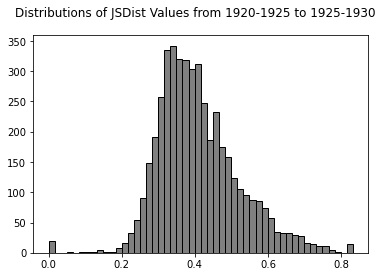

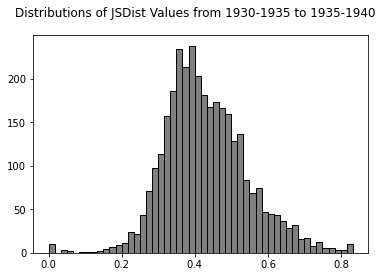

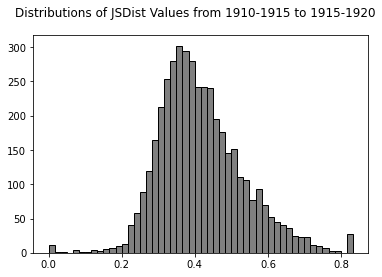

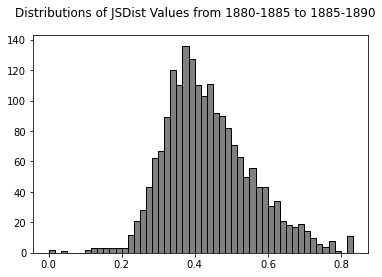

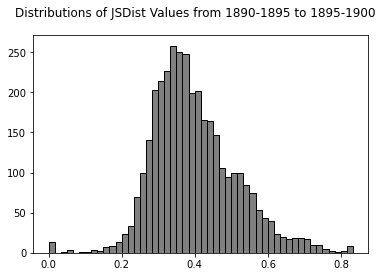

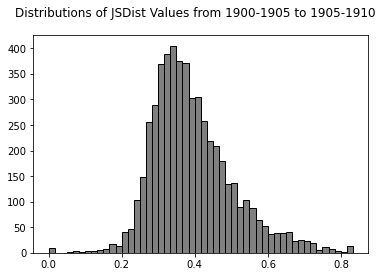

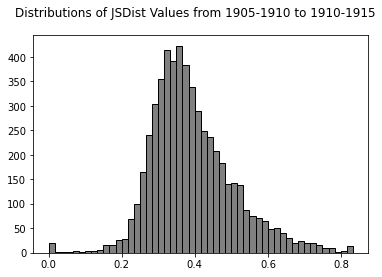

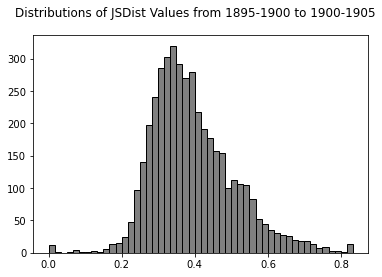

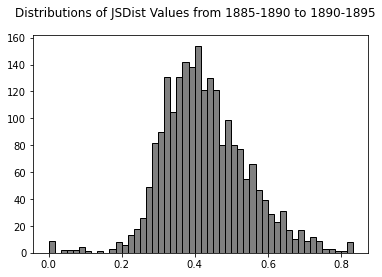

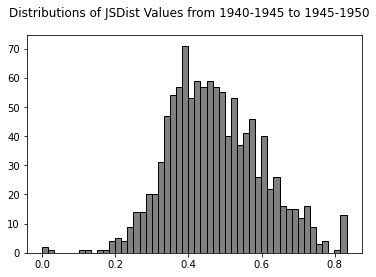

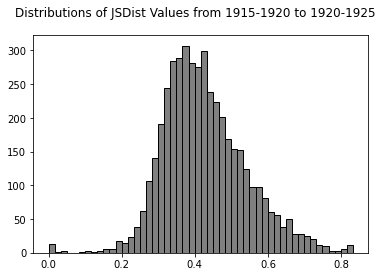

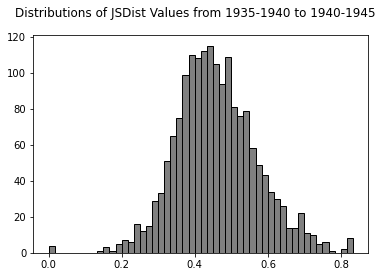

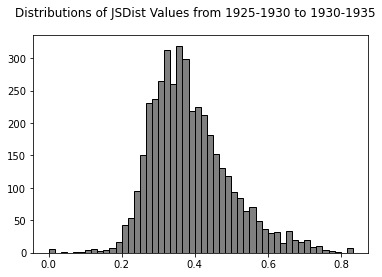

In [17]:
for yr, df in distances.items():
    graphJSDist(df, yr)

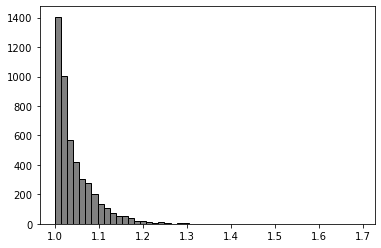

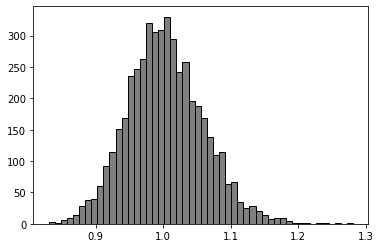

In [4]:
# PRT without normalization does not have a normal distribution
graphCatDist(testDF, 'prt')
# PRT with normalization does have a skew normal distribution
graphCatDist(testDF, 'normed_prt')

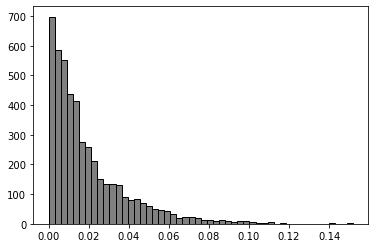

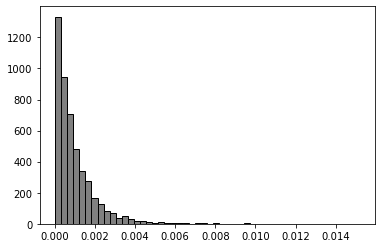

In [5]:
# DIV without normalization does not have a normal distribution
graphCatDist(testDF, 'div')
# Unlike PRT, DIV with normalization also does not have a normal distribution
graphCatDist(testDF, 'normed_div')

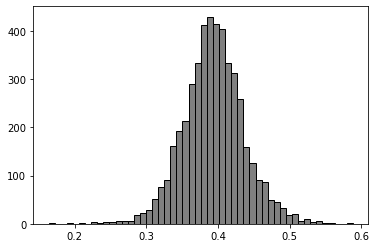

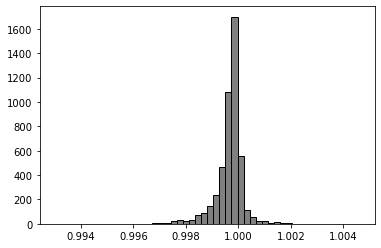

In [6]:
# In the case of APD, both have a skew normal, but kurtosis is more prominent on normed APD.
graphCatDist(testDF, 'apd')
graphCatDist(testDF, 'normed_apd')

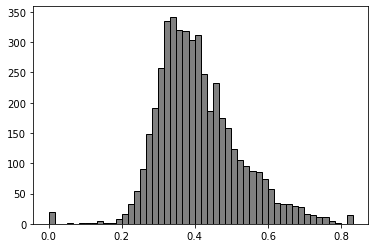

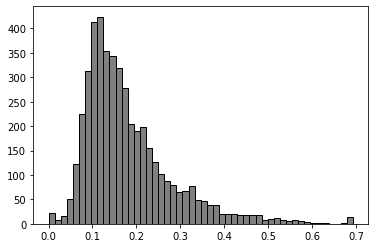

In [9]:
# Jensen Shannon Distance has more of an even distribution than Jensen Shannon Divergence
plt.hist([math.sqrt(i) for i in testDF['jsd']], bins=50, facecolor='grey', edgecolor='black')
plt.show()

plt.hist(testDF['jsd'], bins=50, facecolor='grey', edgecolor='black')
plt.show()